In [12]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt

In [13]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [14]:
# corrs = torch.load('E:\\Ising_model_results_batch\\fc_corr__training_21_nodes_200_epochs.pt')
# corrs = torch.load('E:\\Ising_model_results_batch\\fc_corr_data_training_nodes_90_epochs_50_steps_10_lr_0.001_threshold_0.1_start_0_end_10.pt')
# corrs = torch.load('E:\\Ising_model_results_daai\\fc_corr_data_training_nodes_360_epochs_200_steps_50_lr_0.001_threshold_0.1.pt')
# corrs = torch.load('E:\\Ising_model_results_daai\\fc_corr_data_training_nodes_90_epochs_600_steps_300_lr_0.001_threshold_0.1_start_0_end_10.pt')
# corrs = torch.load('fc_corr_data_training_nodes_21_rep_0_epochs_200_p_0.02_lr_0.001_threshold_0.1_start_0_end_699.pt')
corrs = torch.load('E:\\Ising_model_results_daai\\fc_corr_data_training_nodes_21_rep_0_epochs_200_p_0.019999999552965164_lr_0.001_threshold_0.1_start_0_end_699.pt')
print( corrs.size() )

torch.Size([200, 669])


In [15]:
# rmses = torch.load('E:\\Ising_model_results_batch\\fc_rmse__training_21_nodes_200_epochs.pt')
# rmses = torch.load('E:\\Ising_model_results_daai\\fc_rmse_data_training_nodes_90_epochs_600_steps_300_lr_0.001_threshold_0.1_start_0_end_10.pt')
# rmses = torch.load('fc_rmse_data_training_nodes_21_rep_0_epochs_200_p_0.02_lr_0.001_threshold_0.1_start_0_end_699.pt')
rmses = torch.load('E:\\Ising_model_results_daai\\fc_rmse_data_training_nodes_21_rep_0_epochs_200_p_0.019999999552965164_lr_0.001_threshold_0.1_start_0_end_699.pt')
print( rmses.size() )

torch.Size([200, 669])


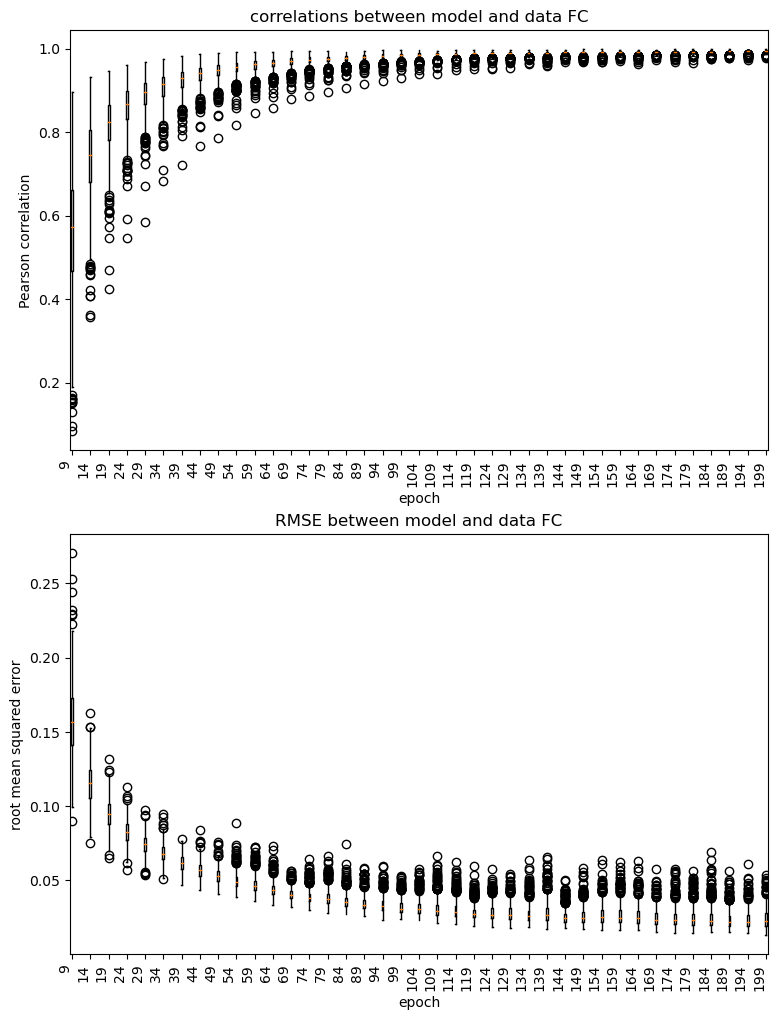

In [16]:
# sample_epochs = torch.arange(start=0, end=200, step=1, dtype=int_type, device=device)
num_epochs = corrs.size(dim=0)
sample_epochs = torch.arange(start=9, end=num_epochs, step=5, dtype=int_type, device=device)
# sample_epochs = torch.arange(start=0, end=50, step=1, dtype=int_type, device=device)
epoch_positions = torch.arange( sample_epochs.numel(), dtype=int_type, device=device )
epoch_positions = epoch_positions.cpu().detach().numpy()
epoch_positions_np = sample_epochs.cpu().detach().numpy()
corrs_np = corrs[sample_epochs,:].transpose(dim0=0, dim1=1).cpu().detach().numpy()
rmses_np = rmses[sample_epochs,:].transpose(dim0=0, dim1=1).cpu().detach().numpy()
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 12))
axs[0].boxplot(corrs_np, positions=epoch_positions_np)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, ha='right')
axs[0].set_title('correlations between model and data FC')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('Pearson correlation')
axs[1].boxplot(rmses_np, positions=epoch_positions_np)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, ha='right')
axs[1].set_title('RMSE between model and data FC')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('root mean squared error')
plt.show()

In [17]:
mid_corrs = corrs[49,:]
mid_rmses = rmses[49,:]
quantile_cutoffs_list = [0.025, 0.5, 0.975]
quantile_cutoffs = torch.tensor(quantile_cutoffs_list, dtype=float_type, device=device)
print( torch.quantile(mid_corrs,quantile_cutoffs) )
print( torch.quantile(mid_rmses,quantile_cutoffs) )

tensor([0.8956, 0.9491, 0.9750], device='cuda:0')
tensor([0.0448, 0.0527, 0.0636], device='cuda:0')


In [18]:
print( torch.min(mid_corrs), torch.max(mid_corrs) )
print( torch.min(mid_rmses), torch.max(mid_rmses) )

tensor(0.7865, device='cuda:0') tensor(0.9896, device='cuda:0')
tensor(0.0411, device='cuda:0') tensor(0.0760, device='cuda:0')


In [19]:
last_corrs = corrs[-1,:]
last_rmses = rmses[-1,:]
print( torch.quantile(last_corrs,quantile_cutoffs) )
print( torch.quantile(last_rmses,quantile_cutoffs) )

tensor([0.9853, 0.9931, 0.9966], device='cuda:0')
tensor([0.0162, 0.0227, 0.0410], device='cuda:0')


In [20]:
print( torch.min(last_corrs), torch.max(last_corrs) )
print( torch.min(last_rmses), torch.max(last_rmses) )

tensor(0.9773, device='cuda:0') tensor(0.9981, device='cuda:0')
tensor(0.0132, device='cuda:0') tensor(0.0537, device='cuda:0')


In [12]:
# Load results from running Sida's code.
sida_output_file = os.path.join('C:\\Users\\agcraig\\Documents\\IsingModel','all_sims_rs.npy')
sims = np.load(sida_output_file)
print( np.shape(sims) )

(303, 50)


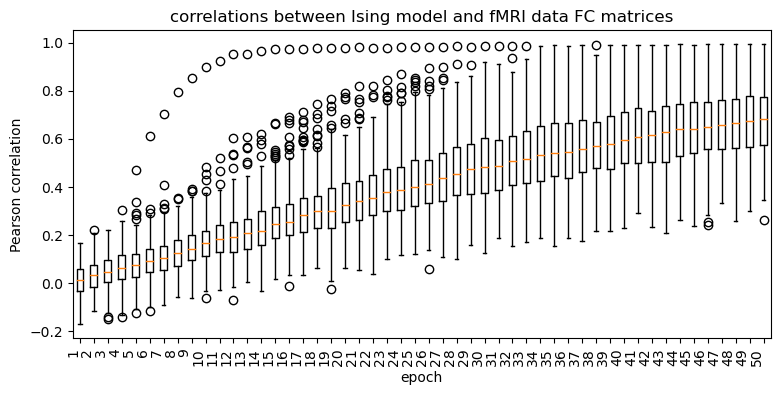

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
axs.boxplot(sims)
# axs.boxplot(sims, positions=epoch_positions_np)
axs.set_xticklabels(axs.get_xticklabels(), rotation=90, ha='right')
axs.set_title('correlations between Ising model and fMRI data FC matrices')
axs.set_xlabel('epoch')
axs.set_ylabel('Pearson correlation')
plt.show()

In [56]:
last_sims = sims[:,-1]
print( np.quantile(last_sims,quantile_cutoffs_list) )

[0.39635583 0.6800337  0.90174658]


In [57]:
print( np.min(last_sims), np.max(last_sims) )

0.26219672638677455 0.9939289207004971


Text(0.5, 1.0, 'comparison of distributions of model-data FC correlations')

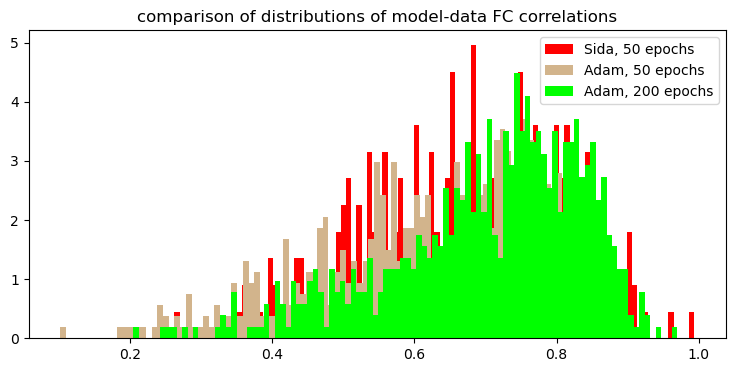

In [67]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
colors = ['red', 'tan', 'lime']
n_bins = 100
# axs.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
axs.hist(last_sims, n_bins, density=True, histtype='bar', color='red', label='Sida, 50 epochs')
mid_corrs_np = mid_corrs.detach().cpu().numpy()
axs.hist(mid_corrs_np, n_bins, density=True, histtype='bar', color='tan', label='Adam, 50 epochs')
last_corrs_np = last_corrs.detach().cpu().numpy()
axs.hist(last_corrs_np, n_bins, density=True, histtype='bar', color='lime', label='Adam, 200 epochs')
axs.legend(prop={'size': 10})
axs.set_title('comparison of distributions of model-data FC correlations')

In [66]:
from scipy import stats
ks_test_sida_vs_50 = stats.kstest(last_sims, mid_corrs_np)
print(ks_test_sida_vs_50)

KstestResult(statistic=0.09298064134771686, pvalue=0.05011232947067423, statistic_location=0.488099604845047, statistic_sign=-1)


In [68]:
ks_test_sida_vs_200 = stats.kstest(last_sims, last_corrs_np)
print(ks_test_sida_vs_200)

KstestResult(statistic=0.16065711048716813, pvalue=3.5439287153178864e-05, statistic_location=0.6871507848145262, statistic_sign=1)


In [69]:
ks_test_50_vs_200 = stats.kstest(mid_corrs_np, last_corrs_np)
print(ks_test_50_vs_200)

KstestResult(statistic=0.18507462686567164, pvalue=1.9238365407636352e-10, statistic_location=0.6221777, statistic_sign=1)
